### Importação dos dados



In [27]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [28]:
import matplotlib.pyplot as plt

faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"Faturamento da Loja 1: R${faturamento_loja1:,.2f}")
print(f"Faturamento da Loja 2: R${faturamento_loja2:,.2f}")
print(f"Faturamento da Loja 3: R${faturamento_loja3:,.2f}")
print(f"Faturamento da Loja 4: R${faturamento_loja4:,.2f}")

valores = {'loja1': faturamento_loja1, 'loja2': faturamento_loja2, 'loja3' : faturamento_loja3, 'loja4': faturamento_loja4}
Lojas = list(valores.keys())

max_valor = max(valores.values())
min_valor = min(valores.values())

faturamento_loja_max = [faturamento for faturamento, valor in valores.items() if valor == max_valor]
faturamento_loja_min = [faturamento for faturamento, valor in valores.items() if valor ==min_valor]
print(f"O maior valor é {max_valor}, encontrado em: {', '.join(faturamento_loja_max)}")
print(f"O menor valor foi {min_valor}, encontrado em: {','.join(faturamento_loja_min)}")




Faturamento da Loja 1: R$1,534,509.12
Faturamento da Loja 2: R$1,488,459.06
Faturamento da Loja 3: R$1,464,025.03
Faturamento da Loja 4: R$1,384,497.58
O maior valor é 1534509.12, encontrado em: loja1
O menor valor foi 1384497.58, encontrado em: loja4


<BarContainer object of 4 artists>

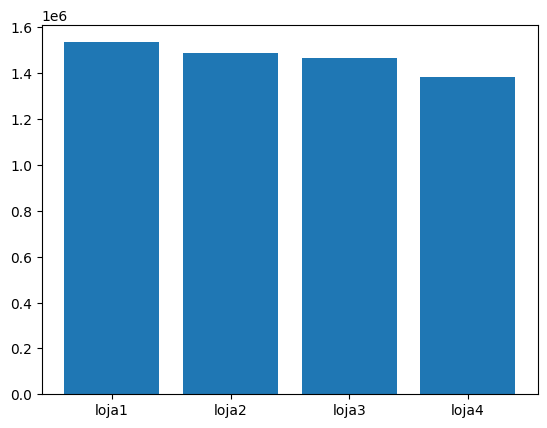

In [29]:
faturamento_global = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
plt.bar(x= Lojas, height = faturamento_global )

# 2. Vendas por Categoria


In [30]:
categorias = (loja['Categoria do Produto'])



In [31]:
print('\033[1mLoja1 \033[0m')
vendas_por_categoria1 = loja.groupby('Categoria do Produto')['Preço'].sum()
print(vendas_por_categoria1)
print()
print('\033[1mLoja2 \033[0m')
vendas_por_categoria2 = (loja2.groupby('Categoria do Produto')['Preço'].sum())
print(vendas_por_categoria2)
print()
print('\033[1mLoja3 \033[0m')
vendas_por_categoria3 = (loja3.groupby('Categoria do Produto')['Preço'].sum())
print(vendas_por_categoria3)
print()
print('\033[1mLoja4 \033[0m')
vendas_por_categoria4 = (loja4.groupby('Categoria do Produto')['Preço'].sum())
print(vendas_por_categoria4)



Loja1 
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Loja2 
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Loja3 
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis                   268095.56
utilidades domesticas     20080.21
Name: Preço, dtype

In [32]:
list_vendas_por_categorias = (list(vendas_por_categoria1),list(vendas_por_categoria2),list(vendas_por_categoria3),list(vendas_por_categoria4))

dic_vendas_categorias = {Lojas: list_vendas_por_categorias for Lojas, list_vendas_por_categorias in zip(Lojas,list_vendas_por_categorias)}
# print(dic_vendas_categorias)
# print(dic_vendas_categorias.get('loja1')[1])

# for i in range(8):
#   print(f"\n comparando valores na posição {i}:")
#   for i in dic_vendas_categorias:
#     for i1 in dic_vendas_categorias:
#       if i != i1 and dic_vendas_categorias[i]> dic_vendas_categorias[i1]:
#         print(f"{i} é maior que {i1}")


for i in range(len(next(iter(dic_vendas_categorias.values())))):
    print(f"\n Posição {i}:")

    valores_pos_i = {k: v[i] for k, v in dic_vendas_categorias.items()}

    max_valor = max(valores_pos_i.values())
    min_valor = min(valores_pos_i.values())

    chaves_max = [k for k, v in valores_pos_i.items() if v == max_valor]
    chaves_min = [k for k, v in valores_pos_i.items() if v == min_valor]

    print(f"Máximo: {max_valor} → {', '.join(chaves_max)}")
    print(f"Mínimo: {min_valor} → {', '.join(chaves_min)}")







 Posição 0:
Máximo: 27015.67 → loja4
Mínimo: 21262.21 → loja2

 Posição 1:
Máximo: 484913.36 → loja1
Mínimo: 377680.65 → loja4

 Posição 2:
Máximo: 572659.23 → loja1
Mínimo: 545966.86 → loja4

 Posição 3:
Máximo: 52387.55 → loja1
Mínimo: 44465.65 → loja4

 Posição 4:
Máximo: 139987.03 → loja2
Mínimo: 100136.5 → loja4

 Posição 5:
Máximo: 13454.35 → loja2
Mínimo: 11713.92 → loja1

 Posição 6:
Máximo: 268095.56 → loja3
Mínimo: 235234.68 → loja2

 Posição 7:
Máximo: 20098.83 → loja4
Mínimo: 16931.48 → loja1


# 3. Média de Avaliação das Lojas

A média da loja1 é: 3.9767
A média da loja2 é: 4.0373
A média da loja3 é: 4.0483
A média da loja4 é: 3.9958


<BarContainer object of 4 artists>

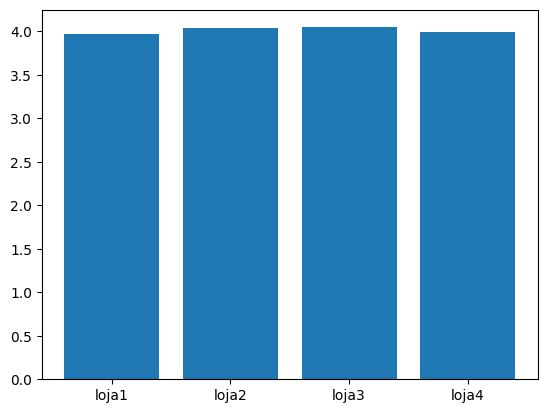

In [33]:
avaliacoes = loja['Avaliação da compra']

media_avaliacoes1 = loja['Avaliação da compra'].sum() / (len(loja['Avaliação da compra']))
media_avaliacoes2 = loja2['Avaliação da compra'].sum() / (len(loja2['Avaliação da compra']))
media_avaliacoes3 = loja3['Avaliação da compra'].sum() / (len(loja3['Avaliação da compra']))
media_avaliacoes4 = loja4['Avaliação da compra'].sum() / (len(loja4['Avaliação da compra']))

print('A média da loja1 é:',media_avaliacoes1.round(4))
print('A média da loja2 é:',media_avaliacoes2.round(4))
print('A média da loja3 é:',media_avaliacoes3.round(4))
print('A média da loja4 é:',media_avaliacoes4.round(4))
media_avaliacoes= [media_avaliacoes1, media_avaliacoes2, media_avaliacoes3, media_avaliacoes4]
plt.bar(x=["loja1", "loja2", "loja3", "loja4"], height=media_avaliacoes)



# 4. Produtos Mais e Menos Vendidos

In [34]:
produto_mais_vendido1 = loja['Produto'].value_counts().idxmax()
produto_menos_vendido1 = loja['Produto'].value_counts().idxmin()
quantidade_vendida11 = loja['Produto'].value_counts().max()
quantidade_vendida12 = loja['Produto'].value_counts().min()

produto_mais_vendido2 = loja2['Produto'].value_counts().idxmax()
produto_menos_vendido2 = loja2['Produto'].value_counts().idxmin()
quantidade_vendida21 = loja2['Produto'].value_counts().max()
quantidade_vendida22 = loja2['Produto'].value_counts().min()

produto_mais_vendido3 = loja3['Produto'].value_counts().idxmax()
produto_menos_vendido3 = loja3['Produto'].value_counts().idxmin()
quantidade_vendida31 = loja3['Produto'].value_counts().max()
quantidade_vendida32 = loja3['Produto'].value_counts().min()

produto_mais_vendido4 = loja4['Produto'].value_counts().idxmax()
produto_menos_vendido4 = loja4['Produto'].value_counts().idxmin()
quantidade_vendida41 = loja4['Produto'].value_counts().max()
quantidade_vendida42 = loja4['Produto'].value_counts().min()




print('Loja1')
print(f"Produto mais vendido, menos vendido e número de vendas (respectivamente) : {produto_mais_vendido1, quantidade_vendida11, produto_menos_vendido1, quantidade_vendida12}")
print()
print('Loja2')
print(f"Produto mais vendido, menos vendido (respectivamente) : {produto_mais_vendido2, quantidade_vendida21, produto_menos_vendido2, quantidade_vendida22}")
print()
print('Loja3')
print(f"Produto mais vendido, menos vendido (respectivamente) : {produto_mais_vendido3, quantidade_vendida31, produto_menos_vendido3, quantidade_vendida32}")
print()
print('Loja4')
print(f"Produto mais vendido, menos vendido (respectivamente) : {produto_mais_vendido4, quantidade_vendida41, produto_menos_vendido4, quantidade_vendida42}")
print()


Loja1
Produto mais vendido, menos vendido e número de vendas (respectivamente) : ('Micro-ondas', 60, 'Headset', 33)

Loja2
Produto mais vendido, menos vendido (respectivamente) : ('Iniciando em programação', 65, 'Jogo de tabuleiro', 32)

Loja3
Produto mais vendido, menos vendido (respectivamente) : ('Kit banquetas', 57, 'Blocos de montar', 35)

Loja4
Produto mais vendido, menos vendido (respectivamente) : ('Cama box', 62, 'Guitarra', 33)



# 5. Frete Médio por Loja


In [35]:
frete_medio1 = (loja['Frete'].sum()/len(loja['Frete']))
frete_medio2 = (loja['Frete'].sum()/len(loja2['Frete']))
frete_medio3 = (loja['Frete'].sum()/len(loja3['Frete']))
frete_medio4 = (loja['Frete'].sum()/len(loja4['Frete']))

print(f"O frete médio da Loja1 foi de: {frete_medio1.round(4)}")
print(f"O frete médio da Loja2 foi de: {frete_medio2.round(5)}")
print(f"O frete médio da Loja3 foi de: {frete_medio3.round(5)}")
print(f"O frete médio da Loja4 foi de: {frete_medio4.round(5)}")



O frete médio da Loja1 foi de: 34.6918
O frete médio da Loja2 foi de: 34.6918
O frete médio da Loja3 foi de: 34.6918
O frete médio da Loja4 foi de: 34.70652


## Relatório

In [38]:
print(f"Com base nas análises feitas a loja mais propensa a ser fechada é a loja 4. O faturamento da loja 4 foi de R${faturamento_loja4:,.2f}, o que representa uma diferença de R${faturamento_loja1-faturamento_loja4:,.2f}, em relação à venda por categoria, a loja 4 foi a que menos vendeu em 4 categorias (eletrodomesticos, eletronicos, esporte e lazer, instrumentos musicais). Apesar da diferença entre a média das avaliações das lojas não variar muito, a loja 4 ficou em terceiro lugar, assim como em relação ao frete médio, em que ficou com o valor mais alto.")

Com base nas análises feitas a loja mais propensa a ser fechada é a loja 4. O faturamento da loja 4 foi de R$1,384,497.58, o que representa uma diferença de R$150,011.54, em relação à venda por categoria, a loja 4 foi a que menos vendeu em 4 categorias (eletrodomesticos, eletronicos, esporte e lazer, instrumentos musicais). Apesar da diferença entre a média das avaliações das lojas não variar muito, a loja 4 ficou em terceiro lugar, assim como em relação ao frete médio, em que ficou com o valor mais alto.
